In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [19]:
# Load the dataset
df = pd.read_csv('online_retail_II.csv')

In [20]:
# Inspect the first few rows
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [21]:
# Check the data types and missing values
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [22]:
# Drop rows with missing CustomerID
df = df.dropna(subset=['Customer ID'])

In [23]:
# Remove duplicates
df = df.drop_duplicates()

In [24]:
# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [25]:
# Create TotalPrice feature
df['TotalPrice'] = df['Quantity'] * df['Price']

# Calculate Recency, Frequency, and Monetary values
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
df_customer = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'Invoice': 'count',
    'TotalPrice': 'sum'
})

# Rename columns
df_customer.columns = ['Recency', 'Frequency', 'Monetary']

# View the new DataFrame
df_customer.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,326,47,-51.74
12347.0,2,222,4921.53
12348.0,75,51,2019.40
12349.0,19,180,4404.54
12350.0,310,17,334.40


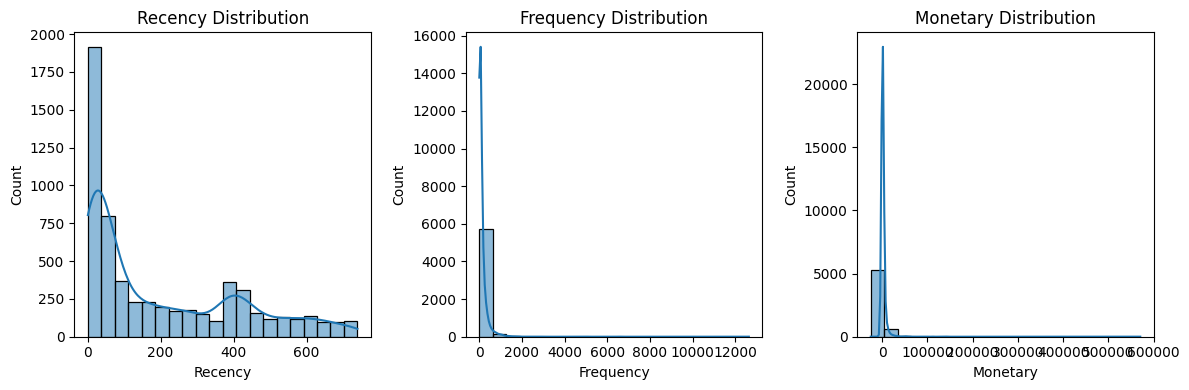

In [26]:
# Plot distributions
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(df_customer['Recency'], bins=20, kde=True)
plt.title('Recency Distribution')

plt.subplot(1,3,2)
sns.histplot(df_customer['Frequency'], bins=20, kde=True)
plt.title('Frequency Distribution')

plt.subplot(1,3,3)
sns.histplot(df_customer['Monetary'], bins=20, kde=True)
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

In [27]:
# Normalize the data
scaler = StandardScaler()
df_customer_normalized = scaler.fit_transform(df_customer)

# Convert back to a DataFrame
df_customer_normalized = pd.DataFrame(df_customer_normalized, columns=df_customer.columns)

In [28]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df_customer['Cluster'] = kmeans.fit_predict(df_customer_normalized)

# View the segmented customers
df_customer.head()

,Recency,Frequency,Monetary,Cluster
Customer ID,,,,
12346.0,326,47,-51.74,0
12347.0,2,222,4921.53,1
12348.0,75,51,2019.40,1
12349.0,19,180,4404.54,1
12350.0,310,17,334.40,0


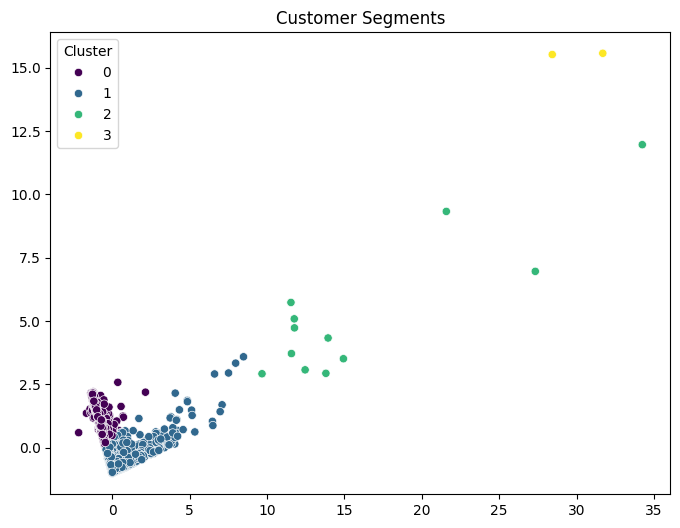

In [29]:
# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_customer_normalized)

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=df_customer['Cluster'], palette='viridis')
plt.title('Customer Segments')
plt.show()

In [30]:
# Group by cluster to see the average RFM values
df_clustered = df_customer.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

df_clustered

,Cluster,Recency,Frequency,Monetary
0,0,466.680275,40.687162,626.440100
1,1,65.950706,166.579718,3147.222315
2,2,3.416667,5116.666667,138690.414167
3,3,1.500000,2470.000000,546861.340000


In [33]:
# DataFrame Processing
df_customer = pd.DataFrame({
    'Customer ID': [12345, 67890, 23456],
    'Recency': [10, 20, 30],
    'Frequency': [5, 3, 2],
    'Monetary': [500, 300, 200],
    'Cluster': [1, 2, 3]
})

# Save to CSV
df_customer.to_csv('customer_segmentation.csv', index=False)

print("Data saved to customer_segmentation.csv")

Data saved to customer_segmentation.csv
